## Problem Statement:

Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 

Variable --> Description

Loan_ID	--> Unique Loan ID

Gender	--> Male/ Female

Married	--> Applicant married (Y/N)

Dependents -->	Number of dependents

Education -->	Applicant Education (Graduate/ Under Graduate)

Self_Employed -->	Self employed (Y/N)

ApplicantIncome -->	Applicant income

CoapplicantIncome -->	Coapplicant income

LoanAmount -->	Loan amount in thousands

Loan_Amount_Term -->	Term of loan in months

Credit_History -->	credit history meets guidelines

Property_Area -->	Urban/ Semi Urban/ Rural

Loan_Status	(Target) --> Loan approved (Y/N)



In [ ]:
# from google.colab import files
# files.upload()

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sn

from scipy import stats

In [ ]:
# Import training dataset
df_tr = pd.read_csv('train_ctrUa4K.csv')
df_tr

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
# check the duplicate rows
df_tr[df_tr.duplicated()].shape

(0, 13)

In [ ]:
# check null values
df_tr.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# check 'space', or '?' format data
df_tr[df_tr.isin(['?'])].any().any()

False

In [ ]:
# check percentage of missing data
round(df_tr.isnull().sum() / df_tr.shape[0] * 100,2)

Loan_ID              0.00
Gender               2.12
Married              0.49
Dependents           2.44
Education            0.00
Self_Employed        5.21
ApplicantIncome      0.00
CoapplicantIncome    0.00
LoanAmount           3.58
Loan_Amount_Term     2.28
Credit_History       8.14
Property_Area        0.00
Loan_Status          0.00
dtype: float64

In [ ]:
# df_tr.dropna(axis='rows',inplace=True)

In [ ]:
df_tr.shape

(614, 13)

In [ ]:
df_tr.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


We observe a high value for Standard Deviation for most of the numerical features.

### EDA

In [ ]:
# creating a list to store skewed features
skew_cols = []

In [ ]:
# Also creating more lists
obj_cols = []
num_cols = []
outlier_cols = []
feature_extracts = []
drop_cols = []

In [ ]:
col_list = df_tr.columns.to_list()

In [ ]:
col_list[-1]

'Loan_Status'

#### Loan_Status

In [ ]:
df_tr['Loan_Status'].head()

0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

Loan_Status is our target feature and it is object type

In [ ]:
obj_cols.append('Loan_Status')

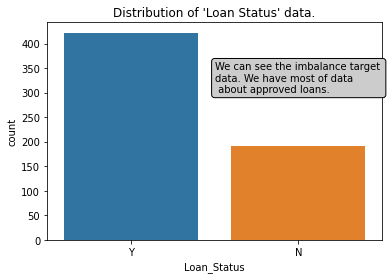

In [ ]:
sn.countplot(x='Loan_Status',data=df_tr,order=['Y','N'])
plt.title("Distribution of 'Loan Status' data.")
plt.annotate(xy=(0.5,300),s='We can see the imbalance target \ndata. We have most of data\n about approved loans.',bbox = dict(boxstyle ="round", fc ="0.8"))
plt.show()

Our target variable data is biased towards approved loans. So, we will use True Posiive Rate and True Negative Rate as performance measure metrics.

In [ ]:
df_tr['Loan_Status'].isnull().sum()

0

We do not observe any null values in this field.

In [ ]:
col_list[0]

'Loan_ID'

#### Loan_ID

In [ ]:
df_tr.Loan_ID.head()

0    LP001002
1    LP001003
2    LP001005
3    LP001006
4    LP001008
Name: Loan_ID, dtype: object

This field is contains data about the unique ID assigned to each loan application.

This feature is object data type, we will convert it to numerical data during model build.


We will drop this feature during model building

In [ ]:
df_tr.drop('Loan_ID',axis='columns',inplace=True)

In [ ]:
drop_cols.append('Loan_ID')

In [ ]:
col_list[1]

'Gender'

#### Gender

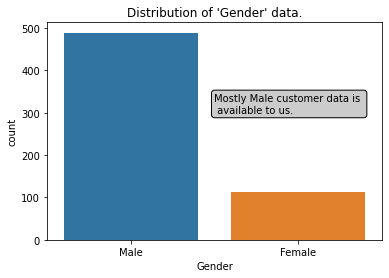

In [ ]:
sn.countplot(x='Gender',data=df_tr)
plt.title("Distribution of 'Gender' data.")
plt.annotate(s='Mostly Male customer data is \n available to us.',xy=(0.5,300),bbox=dict(boxstyle='round',fc='0.8'))
plt.show()

In [ ]:
df_tr['Gender'].isnull().sum()

13

In [ ]:
miss_val = dict()
miss_val['Gender'] = 'mode'
miss_val

{'Gender': 'mode'}

We will replace the missing data from 'Gender' feature with the most frequent value 'Male'.

In [ ]:
obj_cols.append(col_list[1])
obj_cols

['Loan_Status', 'Gender']

In [ ]:
col_list[2]

'Married'

#### Married

In [ ]:
df_tr['Married'].dtypes

dtype('O')

In [ ]:
# Adding the feature to the list of object feature types
obj_cols.append(col_list[2])
obj_cols

['Loan_Status', 'Gender', 'Married']

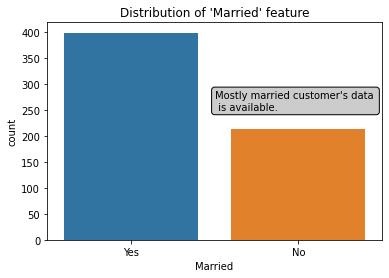

In [ ]:
sn.countplot(x='Married',data=df_tr,order=df_tr['Married'].value_counts().index)
plt.title("Distribution of 'Married' feature")
plt.annotate(s="Mostly married customer's data \n is available.",xy=(0.5,250),bbox=dict(boxstyle='round',fc='0.8'))
plt.show()

In [ ]:
df_tr['Married'].isnull().sum()

3

We will replace the missing values from 'Married' feature with the most frequent value 'Yes'.

In [ ]:
# Adding the feature to missing values dictionary
miss_val['Married'] = 'mode'
miss_val

{'Gender': 'mode', 'Married': 'mode'}

In [ ]:
col_list[3]

'Dependents'

#### Dependents

In [ ]:
df_tr['Dependents'].dtypes

dtype('O')

In [ ]:
# Adding the feature to the list of categorical features
obj_cols.append(col_list[3])
obj_cols

['Loan_Status', 'Gender', 'Married', 'Dependents']

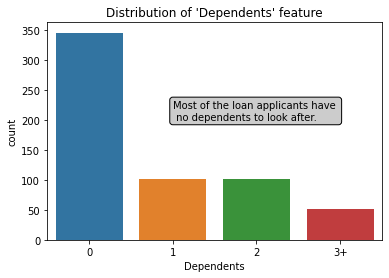

In [ ]:
sn.countplot(x='Dependents',data=df_tr,order=df_tr['Dependents'].value_counts().index)
plt.title("Distribution of 'Dependents' feature")
plt.annotate(s='Most of the loan applicants have \n no dependents to look after.',xy=(1,200),bbox=dict(boxstyle='round',fc='0.8'))
plt.show()

In [ ]:
df_tr['Dependents'].isnull().sum()

15

As 'Dependents' feature is object data type, we will replace the missing values with the most frequent value '0'.

In [ ]:
# Adding the feature to missing values dictionary
miss_val['Dependents'] = 'mode'
miss_val

{'Dependents': 'mode', 'Gender': 'mode', 'Married': 'mode'}

In [ ]:
col_list[4]

'Education'

#### Education

In [ ]:
df_tr['Education'].dtypes

dtype('O')

In [ ]:
# Adding the feature to the list of categorical features
obj_cols.append(col_list[4])
obj_cols

['Loan_Status', 'Gender', 'Married', 'Dependents', 'Education']

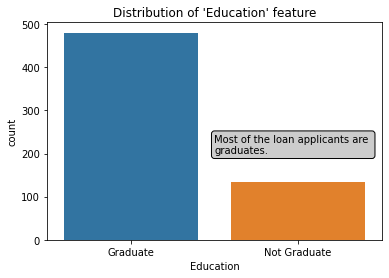

In [ ]:
sn.countplot(x='Education',data=df_tr,order=df_tr['Education'].value_counts().index)
plt.title("Distribution of 'Education' feature")
plt.annotate(s='Most of the loan applicants are \ngraduates.',xy=(0.5,200),bbox=dict(boxstyle='round',fc='0.8'))
plt.show()

In [ ]:
df_tr['Education'].isnull().sum()

0

In [ ]:
col_list[5]

'Self_Employed'

#### Self_Employed

In [ ]:
df_tr['Self_Employed'].dtypes

dtype('O')

In [ ]:
# Adding the feature to the list of categorical features
obj_cols.append(col_list[5])
obj_cols

['Loan_Status',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed']

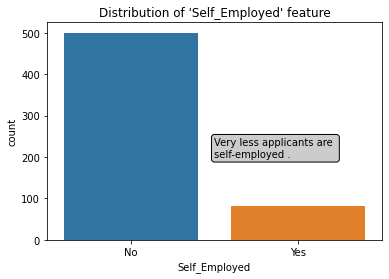

In [ ]:
sn.countplot(x='Self_Employed',data=df_tr,order=df_tr['Self_Employed'].value_counts().index)
plt.title("Distribution of 'Self_Employed' feature")
plt.annotate(s='Very less applicants are \nself-employed .',xy=(0.5,200),bbox=dict(boxstyle='round',fc='0.8'))
plt.show()

In [ ]:
df_tr['Self_Employed'].isnull().sum()

32

We will replace the missing values from the 'Self_Employed' feature with most frequent value 'No'.

In [ ]:
# Adding the feature to missing values dictionary
miss_val['Self_Employed'] = 'mode'
miss_val

{'Dependents': 'mode',
 'Gender': 'mode',
 'Married': 'mode',
 'Self_Employed': 'mode'}

In [ ]:
col_list[6]

'ApplicantIncome'

#### Applicant Income

In [ ]:
df_tr['ApplicantIncome'].head(3)

0    5849
1    4583
2    3000
Name: ApplicantIncome, dtype: int64

In [ ]:
df_tr['ApplicantIncome'].dtypes

dtype('int64')

In [ ]:
# Adding the feature to the list of numerical features
num_cols.append(col_list[6])
num_cols

['ApplicantIncome']

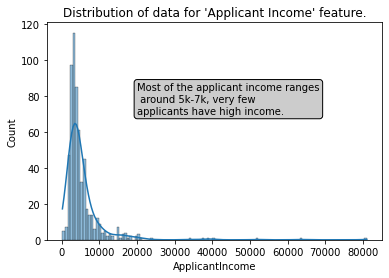

In [ ]:
sn.histplot(x=df_tr['ApplicantIncome'],kde=True)
plt.title("Distribution of data for 'Applicant Income' feature.")
plt.annotate(s='Most of the applicant income ranges\n around 5k-7k, very few \napplicants have high income.',xy=(20000,70),bbox=dict(boxstyle='round',fc='0.8'))
plt.show()

In [ ]:
# Appending col name to skewed columns list
skew_cols.append('ApplicantIncome')
skew_cols

['ApplicantIncome']

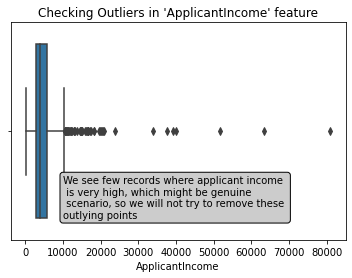

In [ ]:
sn.boxplot(x = 'ApplicantIncome',data=df_tr)
plt.title("Checking Outliers in 'ApplicantIncome' feature")
plt.annotate(s='We see few records where applicant income\n is very high, which might be genuine\n scenario, so we will not try to remove these \noutlying points',xy=(10000,0.4),bbox=dict(boxstyle='round',fc='0.8'))
plt.show()

In [ ]:
df_tr['ApplicantIncome'].isnull().sum()

0

In [ ]:
col_list[7]

'CoapplicantIncome'

#### CoapplicantIncome

In [ ]:
df_tr['CoapplicantIncome'].head(3)

0       0.0
1    1508.0
2       0.0
Name: CoapplicantIncome, dtype: float64

In [ ]:
# Adding the feature to the list of numerical features
num_cols.append(col_list[7])
num_cols

['ApplicantIncome', 'CoapplicantIncome']

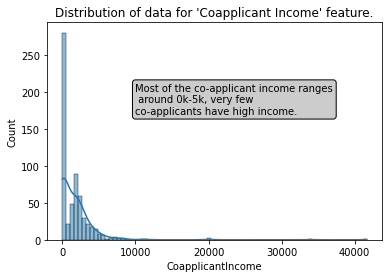

In [ ]:
sn.histplot(x=df_tr['CoapplicantIncome'],kde=True)
plt.title("Distribution of data for 'Coapplicant Income' feature.")
plt.annotate(s='Most of the co-applicant income ranges\n around 0k-5k, very few \nco-applicants have high income.',xy=(10000,170),bbox=dict(boxstyle='round',fc='0.8'))
plt.show()

In [ ]:
# Appending col name to skewed columns list
skew_cols.append('CoapplicantIncome')
skew_cols

['ApplicantIncome', 'CoapplicantIncome']

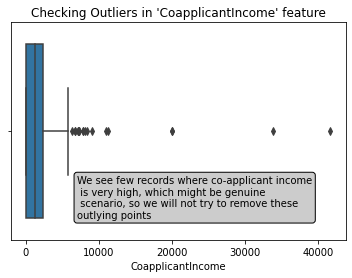

In [ ]:
sn.boxplot(x = 'CoapplicantIncome',data=df_tr)
plt.title("Checking Outliers in 'CoapplicantIncome' feature")
plt.annotate(s='We see few records where co-applicant income\n is very high, which might be genuine\n scenario, so we will not try to remove these \noutlying points',xy=(7000,0.4),bbox=dict(boxstyle='round',fc='0.8'))
plt.show()

In [ ]:
df_tr['CoapplicantIncome'].isnull().sum()

0

In [ ]:
col_list[8]

'LoanAmount'

#### LoanAmount

In [ ]:
df_tr['LoanAmount'].head()

0      NaN
1    128.0
2     66.0
3    120.0
4    141.0
Name: LoanAmount, dtype: float64

In [ ]:
# Adding the feature to the list of numerical features
num_cols.append(col_list[8])
num_cols

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

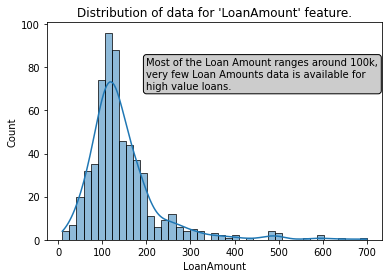

In [ ]:
sn.histplot(x=df_tr['LoanAmount'],kde=True)
plt.title("Distribution of data for 'LoanAmount' feature.")
plt.annotate(s='Most of the Loan Amount ranges around 100k,\nvery few Loan Amounts data is available for \nhigh value loans.',xy=(200,70),bbox=dict(boxstyle='round',fc='0.8'))
plt.show()

In [ ]:
df_tr['LoanAmount'].skew()

2.677551679256059

In [ ]:
# Appending col name to skewed columns list
skew_cols.append('LoanAmount')
skew_cols

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

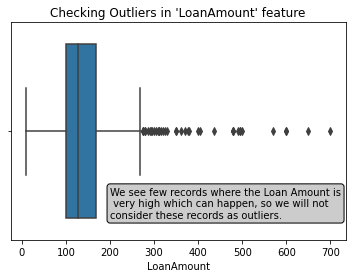

In [ ]:
sn.boxplot(x = 'LoanAmount',data=df_tr)
plt.title("Checking Outliers in 'LoanAmount' feature")
plt.annotate(s='We see few records where the Loan Amount is\n very high which can happen, so we will not \nconsider these records as outliers.',xy=(200,0.4),bbox=dict(boxstyle='round',fc='0.8'))
plt.show()

In [ ]:
df_tr['LoanAmount'].isnull().sum()

22

The data distribution for 'LoanAMount' feature is not normally distributed, so we will replace the missing values with the median .

In [ ]:
# Adding the feature to missing values dictionary
miss_val['LoanAmount'] = 'median'
miss_val

{'Dependents': 'mode',
 'Gender': 'mode',
 'LoanAmount': 'median',
 'Married': 'mode',
 'Self_Employed': 'mode'}

In [ ]:
col_list[9]

'Loan_Amount_Term'

#### Loan_Amount_Term

In [ ]:
df_tr['Loan_Amount_Term'].head()

0    360.0
1    360.0
2    360.0
3    360.0
4    360.0
Name: Loan_Amount_Term, dtype: float64

In [ ]:
df_tr['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [ ]:
# Adding the feature to the list of numerical features
num_cols.append(col_list[9])
num_cols

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

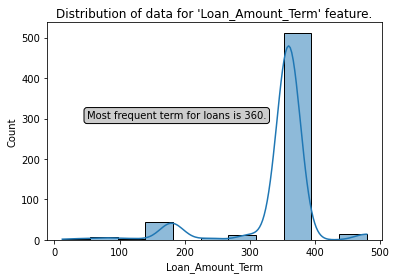

In [ ]:
sn.histplot(x=df_tr['Loan_Amount_Term'],kde=True)
plt.title("Distribution of data for 'Loan_Amount_Term' feature.")
plt.annotate(s='Most frequent term for loans is 360.',xy=(50,300),bbox=dict(boxstyle='round',fc='0.8'))
plt.show()

In [ ]:
df_tr['Loan_Amount_Term'].skew()

-2.362414124216269

In [ ]:
# Appending col name to skewed columns list
skew_cols.append('Loan_Amount_Term')
skew_cols

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [ ]:
df_tr['Loan_Amount_Term'].isnull().sum()

14

The data distribution for 'Loan_Amount_Term' feature is skewed, so we will use 'median' value to replace the missing values.

In [ ]:
# Adding the feature to missing values dictionary
miss_val['Loan_Amount_Term'] = 'median'
miss_val

{'Dependents': 'mode',
 'Gender': 'mode',
 'LoanAmount': 'median',
 'Loan_Amount_Term': 'median',
 'Married': 'mode',
 'Self_Employed': 'mode'}

In [ ]:
col_list[10]

'Credit_History'

#### Credit_History

In [ ]:
df_tr['Credit_History'].head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: Credit_History, dtype: float64

In [ ]:
df_tr['Credit_History'].dtypes

dtype('float64')

In [ ]:
df_tr['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [ ]:
# Adding the feature to the list of numerical features
num_cols.append(col_list[10])
num_cols

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

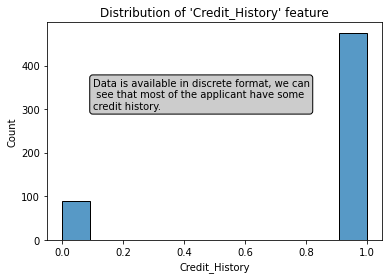

In [ ]:
sn.histplot(x='Credit_History',data=df_tr)
plt.title("Distribution of 'Credit_History' feature")
plt.annotate(s='Data is available in discrete format, we can\n see that most of the applicant have some \ncredit history.',xy=(0.1,300),bbox=dict(boxstyle='round',fc='0.8'))
plt.show()

In [ ]:
df_tr['Credit_History'].isnull().sum()

50

We will replace the missing values from 'Credit_History' feature with the most frequent value which is '1.0'.

In [ ]:
miss_val['Credit_History'] = 'mode'

In [ ]:
col_list[11]

'Property_Area'

#### Property_Area

In [ ]:
df_tr['Property_Area'].head()

0    Urban
1    Rural
2    Urban
3    Urban
4    Urban
Name: Property_Area, dtype: object

In [ ]:
# adding the feature to categorical columns list
obj_cols.append(col_list[11])
obj_cols

['Loan_Status',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

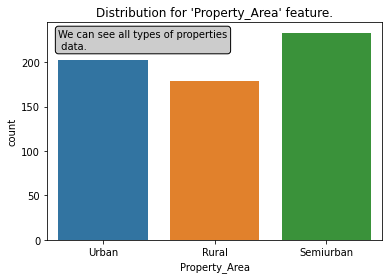

In [ ]:
sn.countplot(x='Property_Area',data=df_tr)
plt.title("Distribution for 'Property_Area' feature.")
plt.annotate(s='We can see all types of properties\n data.',xy=(-0.4,215),bbox=dict(boxstyle='round',fc='0.8'))
plt.show()

In [ ]:
df_tr['Property_Area'].isnull().sum()

0

In [ ]:
print('Numerical columns: ',num_cols)
print('\n')
print('Categorical columns: ',obj_cols)
print('\n')
print('Outliers present in: ',outlier_cols)
print('\n')
print('Skewed columns: ',skew_cols)
print('\n')
print('missing values columns: ',miss_val)
print('\n')

Numerical columns:  ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


Categorical columns:  ['Loan_Status', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']


Outliers present in:  []


Skewed columns:  ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']


missing values columns:  {'Gender': 'mode', 'Married': 'mode', 'Dependents': 'mode', 'Self_Employed': 'mode', 'LoanAmount': 'median', 'Loan_Amount_Term': 'median', 'Credit_History': 'mode'}




# Bi-variate Analysis

In [ ]:
col_list

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

### We will apply chi2 test to check if the categorical columns are related to target column or not.

If the p-value of test is less than significant value (0.05), then we assume the features as dependent otherwise not.

In [ ]:
obj_cols

['Loan_Status',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

'Gender' -- 'Loan_Status'

In [ ]:
dt1 = pd.crosstab(df_tr['Gender'],df_tr['Loan_Status'],margins=True)
dt1

Loan_Status,N,Y,All
Gender,,,
Female,37,75,112
Male,150,339,489
All,187,414,601


In [ ]:
observed_dt1 = dt1.iloc[0:-1,0:-1]
observed_dt1

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


In [ ]:
chi2,p,dof,expected = stats.chi2_contingency(observed=observed_dt1)
print("Chi square stats: ",chi2)
print("p-value: ",p)
print("Degree of freedom: ",dof)
print("Expected: ",expected)

Chi square stats:  0.13962612116543877
p-value:  0.7086529816451106
Degree of freedom:  1
Expected:  [[ 34.84858569  77.15141431]
 [152.15141431 336.84858569]]


We observe that the p-value is 0.7 which is greater than 0.05. So we conclude that the 'Gender' feature and 'Loan_Status' features are not dependent. So, we will drop the 'Gender' feature for predicting.

In [ ]:
drop_cols.append('Gender')

#### Married -- Loan Status

In [ ]:
dt2 = pd.crosstab(df_tr['Married'],df_tr['Loan_Status'],margins=True)
dt2

Loan_Status,N,Y,All
Married,,,
No,79,134,213
Yes,113,285,398
All,192,419,611


In [ ]:
observed_dt2 = dt2.iloc[0:-1,0:-1]
observed_dt2

Loan_Status,N,Y
Married,,
No,79,134
Yes,113,285


In [ ]:
chi2,p,dof,expected = stats.chi2_contingency(observed=observed_dt2)
print("Chi square stats: ",chi2)
print("p-value: ",p)
print("Degree of freedom: ",dof)
print("Expected: ",expected)

Chi square stats:  4.475019348315097
p-value:  0.03439381301579988
Degree of freedom:  1
Expected:  [[ 66.93289689 146.06710311]
 [125.06710311 272.93289689]]


We observe that the p-value is 0.03 which is less than 0.05. So, we can conclude that the 'Married' feature and 'Loan_Status' feature are dependent.

In [ ]:
obj_cols

['Loan_Status',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

#### Dependents -- Loan Status

In [ ]:
dt3 = pd.crosstab(df_tr['Dependents'],df_tr['Loan_Status'],margins=True)
dt3

Loan_Status,N,Y,All
Dependents,,,
0,107,238,345
1,36,66,102
2,25,76,101
3+,18,33,51
All,186,413,599


In [ ]:
observed_dt3 = dt3.iloc[0:-1,0:-1]
observed_dt3

Loan_Status,N,Y
Dependents,,
0,107,238
1,36,66
2,25,76
3+,18,33


In [ ]:
chi2,p,dof,expected = stats.chi2_contingency(observed=observed_dt3)
print("Chi square stats: ",chi2)
print("p-value: ",p)
print("Degree of freedom: ",dof)
print("Expected: ",expected)

Chi square stats:  3.158339770698263
p-value:  0.3678506740863211
Degree of freedom:  3
Expected:  [[107.12854758 237.87145242]
 [ 31.67278798  70.32721202]
 [ 31.36227045  69.63772955]
 [ 15.83639399  35.16360601]]


We observe that the p-value is 0.36 which is greater than 0.05. So, we can conclude that 'Dependents' and 'Loan_Status' feature data are independent.

So, we will drop the 'Dependents' feature

In [ ]:
drop_cols.append('Dependents')
drop_cols

['Loan_ID', 'Gender', 'Dependents']

In [ ]:
obj_cols

['Loan_Status',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

#### Education -- Loan Status

In [ ]:
dt4 = pd.crosstab(df_tr['Education'],df_tr['Loan_Status'],margins=True)
dt4

Loan_Status,N,Y,All
Education,,,
Graduate,140,340,480
Not Graduate,52,82,134
All,192,422,614


In [ ]:
observed_dt4 = dt4.iloc[0:-1,0:-1]
observed_dt4

Loan_Status,N,Y
Education,,
Graduate,140,340
Not Graduate,52,82


In [ ]:
chi2,p,dof,expected = stats.chi2_contingency(observed=observed_dt4)
print("Chi square stats: ",chi2)
print("p-value: ",p)
print("Degree of freedom: ",dof)
print("Expected: ",expected)

Chi square stats:  4.091490413303621
p-value:  0.04309962129357355
Degree of freedom:  1
Expected:  [[150.09771987 329.90228013]
 [ 41.90228013  92.09771987]]


We observe that the p-value is 0.04 which is less than 0.05. So we conclude that 'Education' and 'Loan_status' features are dependent.

In [ ]:
obj_cols

['Loan_Status',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

#### Self_Employed -- Loan_Status

In [ ]:
dt5 = pd.crosstab(df_tr['Self_Employed'],df_tr['Loan_Status'],margins=True)
dt5

Loan_Status,N,Y,All
Self_Employed,,,
No,157,343,500
Yes,26,56,82
All,183,399,582


In [ ]:
observed_dt5 = dt5.iloc[0:-1,0:-1]
observed_dt5

Loan_Status,N,Y
Self_Employed,,
No,157,343
Yes,26,56


In [ ]:
chi2,p,dof,expected = stats.chi2_contingency(observed=observed_dt5)
print("Chi square stats: ",chi2)
print("p-value: ",p)
print("Degree of freedom: ",dof)
print("Expected: ",expected)

Chi square stats:  0.005292770110001114
p-value:  0.9420039242223718
Degree of freedom:  1
Expected:  [[157.21649485 342.78350515]
 [ 25.78350515  56.21649485]]


Here, we observe that the p-value is 0.94 which is greater than 0.05. So, we conclude that 'Self_Employed' and 'Loan_Status' features are independent. 

So, we will drop the 'Self_Employed' feature for predictions.

In [ ]:
drop_cols.append('Self_Employed')
drop_cols

['Loan_ID', 'Gender', 'Dependents', 'Self_Employed']

In [ ]:
obj_cols

['Loan_Status',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

#### Property_Area -- Loan_Status

In [ ]:
dt6 = pd.crosstab(df_tr['Property_Area'],df_tr['Loan_Status'],margins=True)
dt6

Loan_Status,N,Y,All
Property_Area,,,
Rural,69,110,179
Semiurban,54,179,233
Urban,69,133,202
All,192,422,614


In [ ]:
observed_dt6 = dt6.iloc[0:-1,0:-1]
observed_dt6

Loan_Status,N,Y
Property_Area,,
Rural,69,110
Semiurban,54,179
Urban,69,133


In [ ]:
chi2,p,dof,expected = stats.chi2_contingency(observed=observed_dt6)
print("Chi square stats: ",chi2)
print("p-value: ",p)
print("Degree of freedom: ",dof)
print("Expected: ",expected)

Chi square stats:  12.297623130485675
p-value:  0.0021360187811644937
Degree of freedom:  2
Expected:  [[ 55.97394137 123.02605863]
 [ 72.85993485 160.14006515]
 [ 63.16612378 138.83387622]]


We observe that the p-value is 0.002 which is less than 0.05. So, we conclude that 'Property_Area' and 'Loan_Status' features are dependent.

### Now, we will check the relationship between numerical features and target feature.

In [ ]:
num_cols

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [ ]:
num_df = pd.DataFrame(data=df_tr,columns=num_cols)
num_df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0


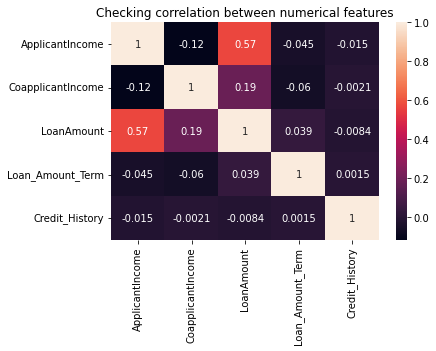

In [ ]:
sn.heatmap(num_df.corr(),annot=True)
plt.title("Checking correlation between numerical features")
plt.show()

We observe that most of our numerical features are not correlated with each other.

#### ApplicantIncome -- Loan Status

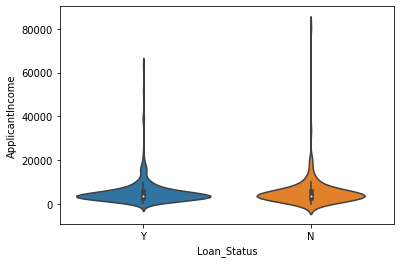

In [ ]:
sn.violinplot(x=df_tr['Loan_Status'],y=df_tr['ApplicantIncome'])
plt.show()

We do not observe any specific difference between the status of loans based solely on the Applicant Income.

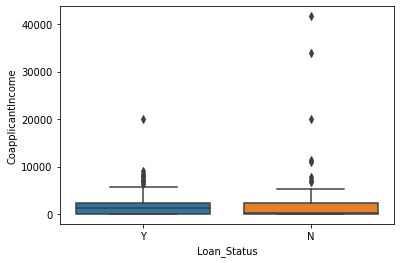

In [ ]:
sn.boxplot(x=df_tr['Loan_Status'],y=df_tr['CoapplicantIncome'])
plt.show()

We do not observe any specific difference between the status of loans based solely on the Co-Applicant Income.

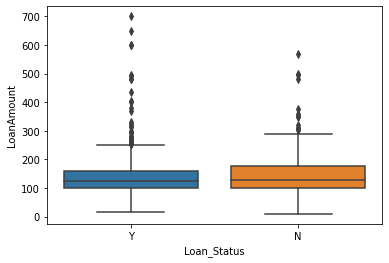

In [ ]:
sn.boxplot(x=df_tr['Loan_Status'],y=df_tr['LoanAmount'])
plt.show()

We do not observe any specific difference between the status of loans based solely on the Loan Amount.

## Multi-variate Analysis

In [ ]:
df_tr.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
# Let's add a new feature 'Total Income'
df_tr['Total_Income'] = df_tr['ApplicantIncome'] + df_tr['CoapplicantIncome']
df_tr[['ApplicantIncome','CoapplicantIncome','Total_Income']]

,ApplicantIncome,CoapplicantIncome,Total_Income
0,5849,0.0,5849.0
1,4583,1508.0,6091.0
2,3000,0.0,3000.0
3,2583,2358.0,4941.0
4,6000,0.0,6000.0
...,...,...,...
609,2900,0.0,2900.0
610,4106,0.0,4106.0
611,8072,240.0,8312.0
612,7583,0.0,7583.0


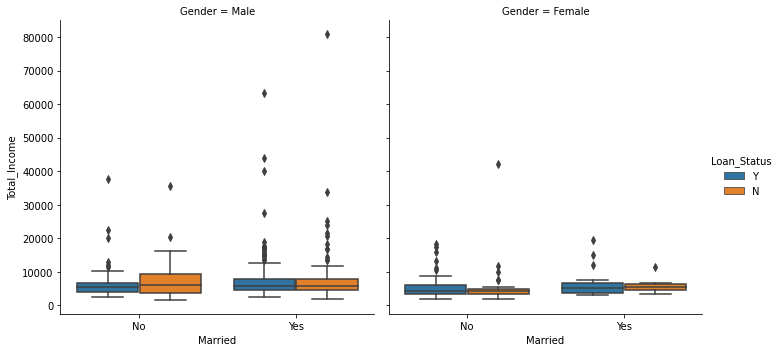

In [ ]:
sn.catplot(x='Married',y='Total_Income',data=df_tr,kind='box',hue='Loan_Status',col='Gender')
plt.show()

We observe that, for unmarried male applicants, the loans are not approved most of the times, irrespective of the total income. But, for married male applicants, the number of approved loans is more than unmarried applicants.

For females, we can see most of the instances are of approved loans, irrespective of the total income.

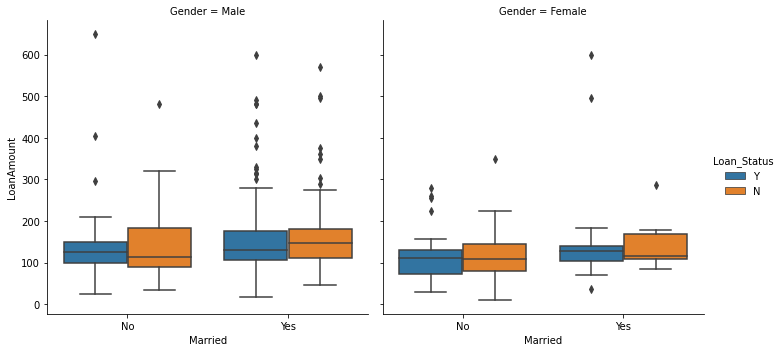

In [ ]:
sn.catplot(x='Married',y='LoanAmount',data=df_tr,kind='box',hue='Loan_Status',col='Gender')
plt.show()

For married male applicants, we observe that the median loan amount for approved loans is lower than the median loan amount for unapproved loans.

We also observe that, most of the approved loan amounts for male applicants are increasing as they get married.

For female applicants, the approvals for loans are increasing for high amounts as applicant gets married.

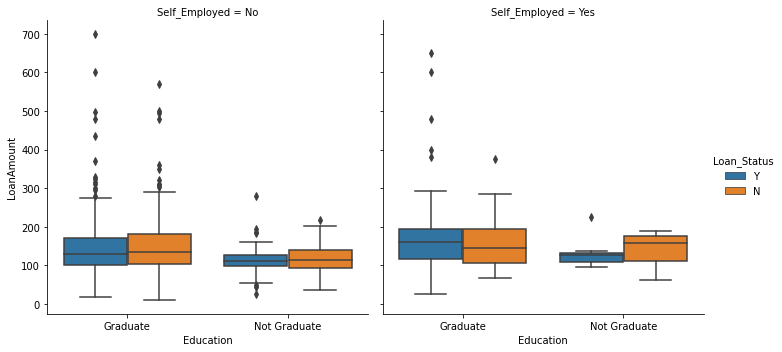

In [ ]:
sn.catplot(x='Education',y='LoanAmount',data=df_tr,kind='box',hue='Loan_Status',col='Self_Employed')
plt.show()

For applicants who are self employed and graduate, the number of approved loans are high as compared to self employed but non-graduates. 

For applicants who are not self employed, the approved loans are more for graduate level educated applicants.

In [ ]:
# create bins for income range
binwidth = int((max(df_tr['Total_Income'])-min(df_tr['Total_Income']))/3)
bins = range(int(min(df_tr['Total_Income'])),int(max(df_tr['Total_Income'])),binwidth)
group_names = ['Low','Medium','High']
df_tr['Income_binned'] = pd.cut(df_tr['Total_Income'],bins,labels=group_names)

In [ ]:
pd.cut(df_tr['Total_Income'],bins)

0      (1442, 27961]
1      (1442, 27961]
2      (1442, 27961]
3      (1442, 27961]
4      (1442, 27961]
           ...      
609    (1442, 27961]
610    (1442, 27961]
611    (1442, 27961]
612    (1442, 27961]
613    (1442, 27961]
Name: Total_Income, Length: 614, dtype: category
Categories (3, interval[int64, right]): [(1442, 27961] < (27961, 54480] < (54480, 80999]]

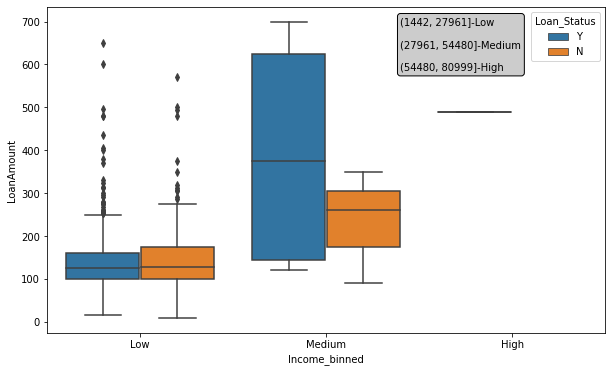

In [ ]:
plt.figure(figsize=(10,6))
sn.boxplot(x='Income_binned',y='LoanAmount',data=df_tr,hue='Loan_Status')
plt.annotate(s='(1442, 27961]-Low\n\n(27961, 54480]-Medium\n\n(54480, 80999]-High',xy=(1.4,585),bbox=dict(boxstyle='round',fc='0.8'))
plt.show()

We observe that applicants with 'Medium' level income has mostly approved loans in our dataset and the range for Loan Amounts for applicants with medium income range is also big.

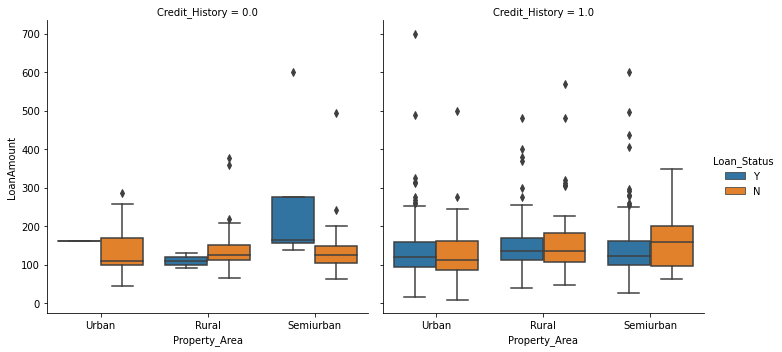

In [ ]:
sn.catplot(x='Property_Area',y='LoanAmount',data=df_tr,kind='box',hue='Loan_Status',col='Credit_History')
plt.show()

The applicants with 'NO' credit history with 'Semi-urban' property area have a lot of approved loans. 

For applicants with 'Urban' and 'Rural' property area, if the credit history is missing, the loans are not approved.



#Pre-Processing

In [ ]:
# Import training dataset
df_tr = pd.read_csv('train_ctrUa4K.csv')
df_tr

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
df_tr.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
num_cols

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [ ]:
obj_cols

['Loan_Status',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [ ]:
drop_cols

['Loan_ID', 'Gender', 'Dependents', 'Self_Employed']

In [ ]:
len(num_cols)+len(obj_cols)

12

### Let's drop the unnecessary columns for prediction.

In [ ]:
drop_cols

['Loan_ID', 'Gender', 'Dependents', 'Self_Employed']

In [ ]:
print('Before Dropping, shape of dataframe: ',df_tr.shape)
df_tr.drop(labels=drop_cols,axis='columns',inplace=True)
print('AfterDropping, shape of dataframe: ',df_tr.shape)

Before Dropping, shape of dataframe:  (614, 13)
AfterDropping, shape of dataframe:  (614, 9)


### Let's handle missing values from the dataset.

In [ ]:
miss_val

{'Credit_History': 'mode',
 'Dependents': 'mode',
 'Gender': 'mode',
 'LoanAmount': 'median',
 'Loan_Amount_Term': 'median',
 'Married': 'mode',
 'Self_Employed': 'mode'}

In [ ]:
for i in drop_cols:
   if i in miss_val.keys():
     miss_val.pop(i)
miss_val

{'Credit_History': 'mode',
 'LoanAmount': 'median',
 'Loan_Amount_Term': 'median',
 'Married': 'mode'}

In [ ]:
for i in miss_val.keys():
  print('{}: '.format(i),df_tr[i].isnull().sum())

Married:  3
LoanAmount:  22
Loan_Amount_Term:  14
Credit_History:  50


In [ ]:
df_tr['Married'].fillna(df_tr['Married'].mode().values[0],inplace=True)
df_tr['LoanAmount'].fillna(df_tr['LoanAmount'].median(),inplace=True)
df_tr['Loan_Amount_Term'].fillna(df_tr['Loan_Amount_Term'].median(),inplace=True)
df_tr['Credit_History'].fillna(df_tr['Credit_History'].mode().values[0],inplace=True)

In [ ]:
# check for missing values
for i in miss_val.keys():
  print("{}: ".format(i),df_tr[i].isnull().sum())

Married:  0
LoanAmount:  0
Loan_Amount_Term:  0
Credit_History:  0


### Let's check the outliers and skewness

In [ ]:
outlier_cols

[]

In [ ]:
skew_cols

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

#### Handling skewness from 'ApplicantIncome' feature:

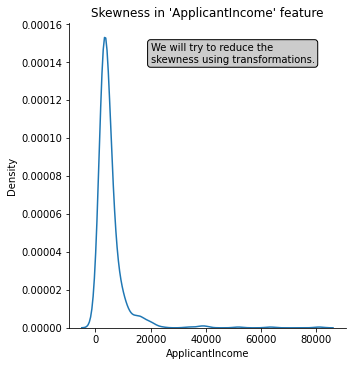

In [ ]:
sn.displot(df_tr['ApplicantIncome'],kind='kde')
plt.title("Skewness in 'ApplicantIncome' feature")
plt.annotate(s='We will try to reduce the \nskewness using transformations.',xy=(20000,0.00014),bbox=dict(boxstyle='round',fc='0.8'))
plt.show()

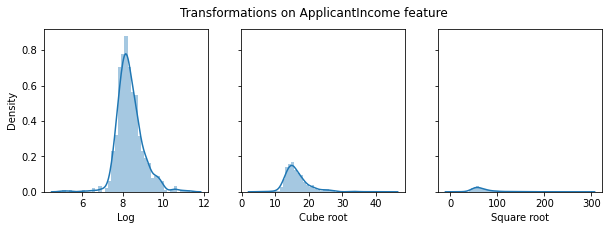

In [ ]:
fig,ax = plt.subplots(1,3,sharey=True,figsize=(10,3))
fig.suptitle("Transformations on ApplicantIncome feature")
sn.distplot(np.log(df_tr['ApplicantIncome']),ax=ax[0],axlabel='Log')
sn.distplot(np.cbrt(df_tr['ApplicantIncome']),ax=ax[1],axlabel='Cube root')
sn.distplot(np.sqrt(df_tr['ApplicantIncome']),ax=ax[2],axlabel='Square root')
plt.show()

We will apply 'Log' transform for 'ApplicantIncome' feature to remove skewness.

In [ ]:
df_tr['ApplicantIncome'].head(3)

0    5849
1    4583
2    3000
Name: ApplicantIncome, dtype: int64

In [ ]:
df_tr['ApplicantIncome'] = np.log(df_tr['ApplicantIncome'])

In [ ]:
df_tr['ApplicantIncome'].head(3)

0    8.674026
1    8.430109
2    8.006368
Name: ApplicantIncome, dtype: float64

Handling skewness from 'CoapplicantIncome' feature:

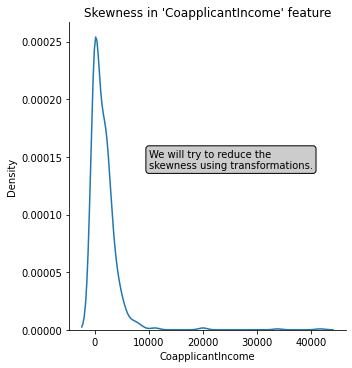

In [ ]:
sn.displot(df_tr['CoapplicantIncome'],kind='kde')
plt.title("Skewness in 'CoapplicantIncome' feature")
plt.annotate(s='We will try to reduce the \nskewness using transformations.',xy=(10000,0.00014),bbox=dict(boxstyle='round',fc='0.8'))
plt.show()

Try Power Transforms

In [ ]:
from scipy.stats import yeojohnson
from scipy.stats import zscore

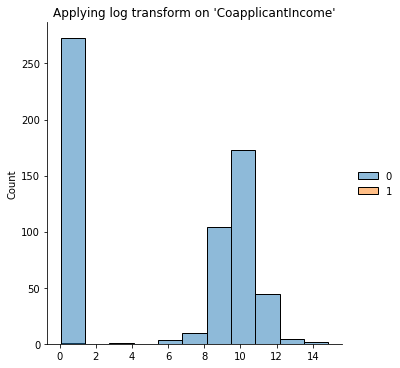

In [ ]:
sn.displot(stats.yeojohnson(df_tr.CoapplicantIncome+1))
plt.title("Applying log transform on 'CoapplicantIncome'")
# plt.annotate(s='skewness is removed',xy=(4.6,0.7),bbox=dict(boxstyle='round',fc='0.8'))
plt.show()

We observe that after transformation, we are getting two modes,

We will try to use zscores to remove much outlying points to reduce skewness.

In [ ]:
z = np.abs(zscore(df_tr['CoapplicantIncome']))
z

array([5.54487330e-01, 3.87315485e-02, 5.54487330e-01, 2.51979602e-01,
       5.54487330e-01, 8.80599712e-01, 3.59954435e-02, 3.01913517e-01,
       3.25753123e-02, 3.19671255e+00, 3.15078148e-01, 7.48168067e-02,
       2.21787100e+00, 4.16829924e-01, 1.83061084e-01, 5.54487330e-01,
       5.54487330e-01, 5.54487330e-01, 5.54487330e-01, 6.42558582e-01,
       5.54487330e-01, 1.36933646e+00, 9.90997380e-02, 1.01151817e-01,
       4.45901040e-01, 5.54487330e-01, 2.16068224e-01, 1.98793688e-01,
       5.54487330e-01, 1.57925994e-01, 5.97754864e-01, 5.54487330e-01,
       5.54487330e-01, 1.56485373e-02, 4.71552023e-01, 1.52453784e-01,
       9.96098834e-02, 5.54901912e-02, 1.91142725e+00, 1.59905504e-02,
       5.54487330e-01, 1.39625418e-01, 5.54487330e-01, 2.44455313e-01,
       5.54487330e-01, 5.54487330e-01, 5.54487330e-01, 5.54487330e-01,
       6.22037795e-01, 2.23592513e-01, 7.78223556e-03, 5.54487330e-01,
       5.54487330e-01, 5.54487330e-01, 5.54487330e-01, 1.55358022e-01,
      

In [ ]:
len(z)

614

In [ ]:
df_tr.shape

(614, 9)

Here, we have zscore values for each value of 'CoapplicantIncome' feature.
Zscore tells us how much standard deviations away a value is from the mean.

In [ ]:
df_tr['CoapplicantIncome'][z>3]

9      10968.0
177    11300.0
402    20000.0
417    20000.0
581    33837.0
600    41667.0
Name: CoapplicantIncome, dtype: float64

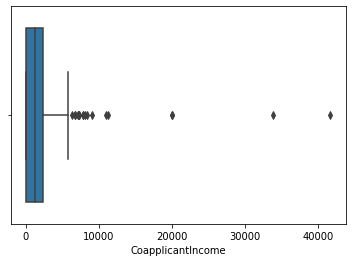

In [ ]:
sn.boxplot(df_tr['CoapplicantIncome'])
plt.show()

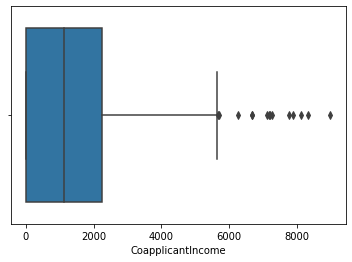

In [ ]:
sn.boxplot(df_tr['CoapplicantIncome'][(z<3)])
plt.show()

Here, we observe that most of the co-applicant income is less than 2000, so the scenarios where co-applicant is earning more are coming as outliers.

We will try model prediction without applying any transform to this feature.

#### Handling skewness from 'LoanAmount' feature

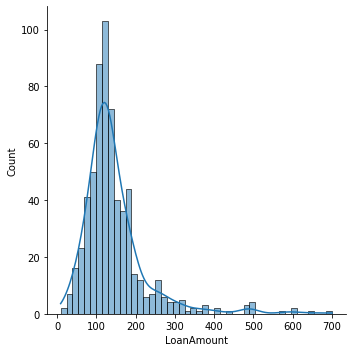

In [ ]:
sn.displot(df_tr['LoanAmount'],kde=True)
plt.show()

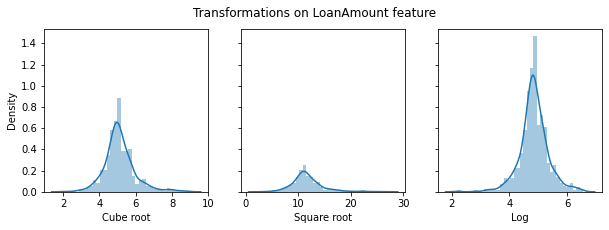

In [ ]:
fig,ax = plt.subplots(1,3,sharey=True,figsize=(10,3))
fig.suptitle("Transformations on LoanAmount feature")
sn.distplot(np.cbrt(df_tr['LoanAmount']),ax=ax[0],axlabel='Cube root')
sn.distplot(np.sqrt(df_tr['LoanAmount']),ax=ax[1],axlabel='Square root')
sn.distplot(np.log(df_tr['LoanAmount']),ax=ax[2],axlabel='Log')
plt.show()

We will apply cuberoot transformation for 'LoanAmount' feature.

In [ ]:
df_tr['LoanAmount'].head(3)

0    128.0
1    128.0
2     66.0
Name: LoanAmount, dtype: float64

In [ ]:
df_tr['LoanAmount'] = np.cbrt(df_tr['LoanAmount'])
df_tr['LoanAmount'].head(3)

0    5.039684
1    5.039684
2    4.041240
Name: LoanAmount, dtype: float64

Handling skewness from 'Loan_Amount_Term' feature

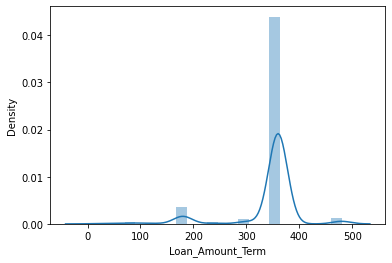

In [ ]:
sn.distplot(df_tr['Loan_Amount_Term'])
plt.show()

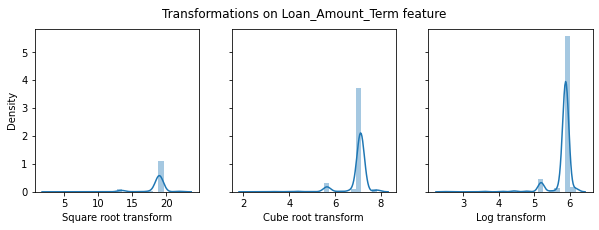

In [ ]:
fig, ax = plt.subplots(1,3,sharey=True,figsize=(10,3))
sn.distplot(np.sqrt(df_tr['Loan_Amount_Term']),ax=ax[0],axlabel='Square root transform')

sn.distplot(np.cbrt(df_tr['Loan_Amount_Term']),ax=ax[1],axlabel='Cube root transform')

sn.distplot(np.log(df_tr['Loan_Amount_Term']),ax=ax[2],axlabel='Log transform')

fig.suptitle('Transformations on Loan_Amount_Term feature')
plt.show()

Transformations are not having any effect on the skewness.
We will keep the data from 'Loan_Amount_Term' feature as it is.

We have handled the skewness from the respective features from above.

Let's convert categorical features to numeric data type.

In [ ]:
obj_cols

['Loan_Status',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [ ]:
# remove the dropped feature names 
obj_cols = [i for i in obj_cols if i not in drop_cols]
obj_cols

['Loan_Status', 'Married', 'Education', 'Property_Area']

In [ ]:
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()

In [ ]:
df_tr[['Married','Education','Property_Area','Loan_Status']]

,Married,Education,Property_Area,Loan_Status
0,No,Graduate,Urban,Y
1,Yes,Graduate,Rural,N
2,Yes,Graduate,Urban,Y
3,Yes,Not Graduate,Urban,Y
4,No,Graduate,Urban,Y
...,...,...,...,...
609,No,Graduate,Rural,Y
610,Yes,Graduate,Rural,Y
611,Yes,Graduate,Urban,Y
612,Yes,Graduate,Urban,Y


In [ ]:
for i in obj_cols:
  df_tr[i] = le.fit_transform(df_tr[i].astype(str))
df_tr[['Married','Education','Property_Area','Loan_Status']]

,Married,Education,Property_Area,Loan_Status
0,0,0,2,1
1,1,0,0,0
2,1,0,2,1
3,1,1,2,1
4,0,0,2,1
...,...,...,...,...
609,0,0,0,1
610,1,0,0,1
611,1,0,2,1
612,1,0,2,1


In [ ]:
df_tr.dtypes

Married                int64
Education              int64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

We have converted all  categorical features to numerical features.

#### Let's add some new features

In [ ]:
# add a new feature displaying total income 
df_tr['Total_Income'] = df_tr['ApplicantIncome'] + df_tr['CoapplicantIncome']

In [ ]:
df_tr.columns

Index(['Married', 'Education', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status', 'Total_Income'],
      dtype='object')

### Building model

In [ ]:
x = df_tr.drop('Loan_Status',axis='columns')
y = df_tr['Loan_Status']
print('x shape: ',x.shape)
print('y shape: ',y.shape)

x shape:  (614, 9)
y shape:  (614,)


In [ ]:
x.isnull().sum()

Married              0
Education            0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Total_Income         0
dtype: int64

Apply scaling to independent dataset to make it on same scale.

In [ ]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()

We will create a copy of independent features before it gets converted to numpy array.

In [ ]:
x_ = x.copy()

In [ ]:
x = s.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# split the data into training and testing categories
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
print('x_train shape: ',x_train.shape)
print('x_test shape: ',x_test.shape)
print('y_train shape: ',y_train.shape)
print('y_test shape: ',y_test.shape)

x_train shape:  (429, 9)
x_test shape:  (185, 9)
y_train shape:  (429,)
y_test shape:  (185,)


As this is a classification algorithm problem, we will try LogisticRegression,SVM,K-Nearest Neighbor, DecisionTrees.

Our dataset is imbalanced dataset, so we will use confusion matrix to measure the performance.

TPR = correct predicted positives / total of actual positives -- Recall or Sensitivity.

TNR = correct predicted negatives / total of actual negatives -- Specificity

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred_lg = lg.predict(x_test)
conf_mat_lg = confusion_matrix(y_test,pred_lg)
print("Confusion Matrix: ",conf_mat_lg)
TPR_lg = conf_mat_lg[0][0]/(conf_mat_lg[0][0]+conf_mat_lg[1][0])
print("Recall/Sensitivity: ",TPR_lg)
TNR_lg = conf_mat_lg[1][1]/(conf_mat_lg[1][1]+conf_mat_lg[0][1])
print("Specificity: ",TNR_lg)

Confusion Matrix:  [[ 28  37]
 [  2 118]]
Recall/Sensitivity:  0.9333333333333333
Specificity:  0.7612903225806451


In [ ]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred_dtc = dtc.predict(x_test)
conf_mat_dtc = confusion_matrix(y_test,pred_dtc)
print("Confusion Matrix: ",conf_mat_dtc)
TPR_dtc = conf_mat_dtc[0][0]/(conf_mat_dtc[0][0]+conf_mat_dtc[1][0])
print("Recall/Sensitivity: ",TPR_dtc)
TNR_dtc = conf_mat_dtc[1][1]/(conf_mat_dtc[1][1]+conf_mat_dtc[0][1])
print("Specificity: ",TNR_dtc)

Confusion Matrix:  [[32 33]
 [26 94]]
Recall/Sensitivity:  0.5517241379310345
Specificity:  0.7401574803149606


In [ ]:
svc=SVC()
svc.fit(x_train,y_train)
pred_svc = svc.predict(x_test)
conf_mat_svc = confusion_matrix(y_test,pred_svc)
print("Confusion Matrix: ",conf_mat_svc)
TPR_svc = conf_mat_svc[0][0]/(conf_mat_svc[0][0]+conf_mat_svc[1][0])
print("Recall/Sensitivity: ",TPR_svc)
TNR_svc = conf_mat_svc[1][1]/(conf_mat_svc[1][1]+conf_mat_svc[0][1])
print("Specificity: ",TNR_svc)

Confusion Matrix:  [[ 27  38]
 [  2 118]]
Recall/Sensitivity:  0.9310344827586207
Specificity:  0.7564102564102564


In [ ]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)
conf_mat_knn = confusion_matrix(y_test,pred_knn)
print("Confusion Matrix: ",conf_mat_knn)
TPR_knn = conf_mat_knn[0][0]/(conf_mat_knn[0][0]+conf_mat_knn[1][0])
print("Recall/Sensitivity: ",TPR_knn)
TNR_knn = conf_mat_knn[1][1]/(conf_mat_knn[1][1]+conf_mat_knn[0][1])
print("Specificity: ",TNR_knn)

Confusion Matrix:  [[ 28  37]
 [  4 116]]
Recall/Sensitivity:  0.875
Specificity:  0.7581699346405228


In [ ]:
# make a list of TPR and TNR values
tpr_list = list((TPR_lg,TPR_dtc,TPR_svc,TPR_knn))
tnr_list = list((TNR_lg,TNR_dtc,TNR_svc,TNR_knn))

In [ ]:
# make a dictionary to see the results
tpr_dict = {'log':TPR_lg,'DTC':TPR_dtc,'SVC':TPR_svc,'KNN':TPR_knn}
tnr_dict = {'log':TNR_lg,'DTC':TNR_dtc,'SVC':TNR_svc,'KNN':TNR_knn}

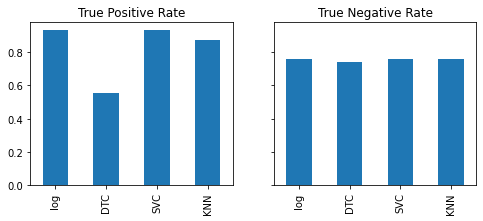

In [ ]:
fig,ax = plt.subplots(1,2,sharey=True,figsize=(8,3))
pd.Series(tpr_dict).plot(kind='bar',ax=ax[0])
ax[0].set_title("True Positive Rate")
pd.Series(tnr_dict).plot(kind='bar',ax=ax[1])
ax[1].set_title("True Negative Rate")
plt.show()

Without any hyper-parameter tuning , we see the logistic regression algorithm is giving us maximum True Positive Rate and also, True Negative Rate.

### To decide between various alogrithms, we will take help of auc-roc score which gives the area under ROC curve.

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
print("ROC-AUC Score for Logistic regressor :",roc_auc_score(y_test,pred_lg))
print("ROC-AUC Score for Decision Trees :",roc_auc_score(y_test,pred_dtc))
print("ROC-AUC Score for Support Vector Machines :",roc_auc_score(y_test,pred_svc))
print("ROC-AUC Score for KNN :",roc_auc_score(y_test,pred_knn))

ROC-AUC Score for Logistic regressor : 0.7070512820512821
ROC-AUC Score for Decision Trees : 0.6378205128205128
ROC-AUC Score for Support Vector Machines : 0.6993589743589743
ROC-AUC Score for KNN : 0.6987179487179488


Logistic Regressor has maximum ROC-AUC Score.
From auc-roc score also, we got confirmation for using Logistic Regression.

In [ ]:
print("Accuracy score of Logistic Regression: ",accuracy_score(y_test,pred_lg))

Accuracy score of Logistic Regression:  0.7891891891891892


In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
print("Cross validation score mean: ",np.mean(cross_val_score(lg,x,y,cv=5)))

Cross validation score mean:  0.8078368652538984


In [ ]:
print("The difference between accuracy score and cross validation score is {} i.e. minimum".format((np.mean(cross_val_score(lg,x,y,cv=5))-(accuracy_score(y_test,pred_lg)))))

The difference between accuracy score and cross validation score is 0.018647676064709184 i.e. minimum


### Hyper-parameter Tuning of Logistic Regression

In [ ]:
clf = LogisticRegression()

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_param = {
    'C':[0.001,0.01,0.1,1,10,100,1000],
    'penalty' : ['l1','l2'],
    'solver' : ['newton-cg','lbfgs','liblinear','sag','saga']
}

grid_search = GridSearchCV(estimator=clf,
                           param_grid = grid_param,
                           cv=5)
grid_search.fit(x_train,y_train)

print("Best Parameters: ",grid_search.best_params_)
print("Mean Accuracy : ",grid_search.best_score_)

Best Parameters:  {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
Mean Accuracy :  0.8204651162790698


Let's try some ensembling algorithms and check if we can get improved results.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
pred_rfc = rfc.predict(x_test)
conf_mat_rfc = confusion_matrix(y_test,pred_rfc)
print("Confusion Matrix: ",conf_mat_rfc)
TPR_rfc = conf_mat_rfc[0][0]/(conf_mat_rfc[0][0]+conf_mat_rfc[1][0])
print("Recall/Sensitivity: ",TPR_rfc)
TNR_rfc = conf_mat_rfc[1][1]/(conf_mat_rfc[1][1]+conf_mat_rfc[0][1])
print("Specificity: ",TNR_rfc)

Confusion Matrix:  [[ 33  32]
 [  6 114]]
Recall/Sensitivity:  0.8461538461538461
Specificity:  0.7808219178082192


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
abc.fit(x_train,y_train)
pred_abc = abc.predict(x_test)
conf_mat_abc = confusion_matrix(y_test,pred_abc)
print("Confusion Matrix: ",conf_mat_abc)
TPR_abc = conf_mat_abc[0][0]/(conf_mat_abc[0][0]+conf_mat_abc[1][0])
print("Recall/Sensitivity: ",TPR_abc)
TNR_abc = conf_mat_abc[1][1]/(conf_mat_abc[1][1]+conf_mat_abc[0][1])
print("Specificity: ",TNR_abc)

Confusion Matrix:  [[ 32  33]
 [  4 116]]
Recall/Sensitivity:  0.8888888888888888
Specificity:  0.7785234899328859


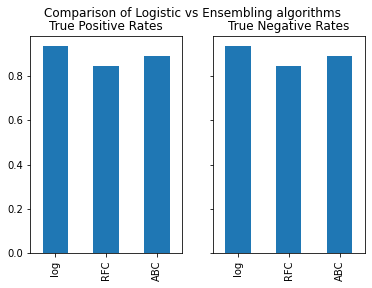

In [ ]:
fig,ax = plt.subplots(1,2,sharey=True)
plt.suptitle("Comparison of Logistic vs Ensembling algorithms")
pd.Series({'log':TPR_lg,'RFC':TPR_rfc,'ABC':TPR_abc}).plot(kind='bar',ax=ax[0])
ax[0].set_title("True Positive Rates")
pd.Series({'log':TPR_lg,'RFC':TPR_rfc,'ABC':TPR_abc}).plot(kind='bar',ax=ax[1])
ax[1].set_title("True Negative Rates")
plt.show()

We see that the True Positive Rate and True Negative Rate values are maximum for logistic regressor model only. So, we will not use ensembling methods.

### Let's check the accuracy score of logistic regressor model after hyper-parameter tuning

In [ ]:
grid_search.best_params_

{'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}

In [ ]:
fin_model = LogisticRegression(penalty='l2',C=0.001,solver='liblinear')
fin_model.fit(x_train,y_train)
pred_fin = fin_model.predict(x_test)
print("Accuracy: ",accuracy_score(y_test,pred_fin))
print("Cross Validation Accuracy: ",np.mean(cross_val_score(fin_model,x,y,cv=5)))

Accuracy:  0.7837837837837838
Cross Validation Accuracy:  0.809462881514061


In [ ]:
# # save the model
# import pickle
# filename = "AVD_Loan_Prediction.pkl"
# pickle.dump(fin_model,open(filename,'wb'))

### Testing the model performance on test dataset

In [ ]:
df_test = pd.read_csv('test_lAUu6dG.csv')
df_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [ ]:
# Let's create a copy of test dataset to get loan_id later on
df_test_copy = df_test.copy()

drop unnecessary columns

In [ ]:
drop_cols

['Loan_ID', 'Gender', 'Dependents', 'Self_Employed']

In [ ]:
print('Before Dropping, shape of dataframe: ',df_test.shape)
df_test.drop(labels=drop_cols,axis='columns',inplace=True)
print('AfterDropping, shape of dataframe: ',df_test.shape)

Before Dropping, shape of dataframe:  (367, 12)
AfterDropping, shape of dataframe:  (367, 8)


Handle the missing values

In [ ]:
num_cols

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [ ]:
# check null or inf values
print(df_test.isnull().sum())
print('\n')
print(np.isinf(df_test[[i for i in num_cols]]).sum())

Married               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64


In [ ]:
df_test['Married'].fillna(df_test['Married'].mode().values[0],inplace=True)
df_test['LoanAmount'].fillna(df_test['LoanAmount'].median(),inplace=True)
df_test['Loan_Amount_Term'].fillna(df_test['Loan_Amount_Term'].median(),inplace=True)
df_test['Credit_History'].fillna(df_test['Credit_History'].mode().values[0],inplace=True)

In [ ]:
# check null or inf values
print(df_test.isnull().sum())
print('\n')
print(np.isinf(df_test[[i for i in num_cols]]).sum())

Married              0
Education            0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64


Apply transformations

In [ ]:
# these records will create error while log transform
df_test[df_test['ApplicantIncome']==0]

,Married,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
25,No,Graduate,0,24000,148.0,360.0,0.0,Rural
116,No,Not Graduate,0,1760,180.0,360.0,1.0,Semiurban


In [ ]:
print("%ge of records with zero applicant income: {:.2f}%".format((df_test[df_test['ApplicantIncome']==0].shape[0]/df_test.shape[0])*100))

%ge of records with zero applicant income: 0.54%


In [ ]:
# drop these records as they are creating infinity on applying log transform -->not working
# df_test.drop(index=[25,116],inplace=True)
# df_test_copy.drop(index=[25,116],inplace=True)

# Instead of dropping the records, we can add 1 to the applicant income feature,
# after log transform, it anyhow converts to zero because log(1) = 0
df_test.loc[[25,116],'ApplicantIncome'] = 1

In [ ]:
df_test.loc[[25,116],:]

,Married,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
25,No,Graduate,1,24000,148.0,360.0,0.0,Rural
116,No,Not Graduate,1,1760,180.0,360.0,1.0,Semiurban


In [ ]:
print(np.isinf(np.log(df_test['ApplicantIncome'])).sum())

0


In [ ]:
df_test['ApplicantIncome'] = np.log(df_test['ApplicantIncome'])

In [ ]:
df_test['LoanAmount'] = np.cbrt(df_test['LoanAmount'])

Label encoding of categorical features

In [ ]:
obj_cols.remove('Loan_Status')
obj_cols

['Married', 'Education', 'Property_Area']

In [ ]:
for i in obj_cols:
  df_test[i] = le.fit_transform(df_test[i].astype(str))

Add a new feature

In [ ]:
# add a new feature displaying total income 
df_test['Total_Income'] = df_test['ApplicantIncome'] + df_test['CoapplicantIncome']

In [ ]:
# check null or inf values
print(df_test.isnull().sum())
print('\n')
print(np.isinf(df_test).values.sum())

Married              0
Education            0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Total_Income         0
dtype: int64


0


Use Standard Scaler

In [ ]:
df_test = s.fit_transform(df_test)

In [ ]:
# load the saved model
import pickle
filename = '/content/AVD_Loan_Prediction.pkl'
loaded_model = pickle.load(open(filename,'rb'))

In [ ]:
fin_predictions = loaded_model.predict(df_test)
fin_predictions

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
df_test_copy.shape

(367, 12)

In [ ]:
fin_predictions.shape

(367,)

In [ ]:
# preparing submission file
pred_df = pd.DataFrame(data=fin_predictions,columns=['Loan_Status'])
subm_df = pd.concat([df_test_copy['Loan_ID'],pred_df],axis=1)
subm_df['Loan_Status'] = subm_df['Loan_Status'].map({1:'Yes',0:'No'})
subm_df.to_csv("AVD_loan_prediction_submission.csv",index=False)

In [ ]:
print(subm_df)

      Loan_ID Loan_Status
0    LP001015         Yes
1    LP001022         Yes
2    LP001031         Yes
3    LP001035         Yes
4    LP001051         Yes
..        ...         ...
362  LP002971         Yes
363  LP002975         Yes
364  LP002980         Yes
365  LP002986         Yes
366  LP002989         Yes

[367 rows x 2 columns]
